/tmp/ipython-input-2919093177.py:23: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))
/tmp/ipython-input-2919093177.py:23: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))


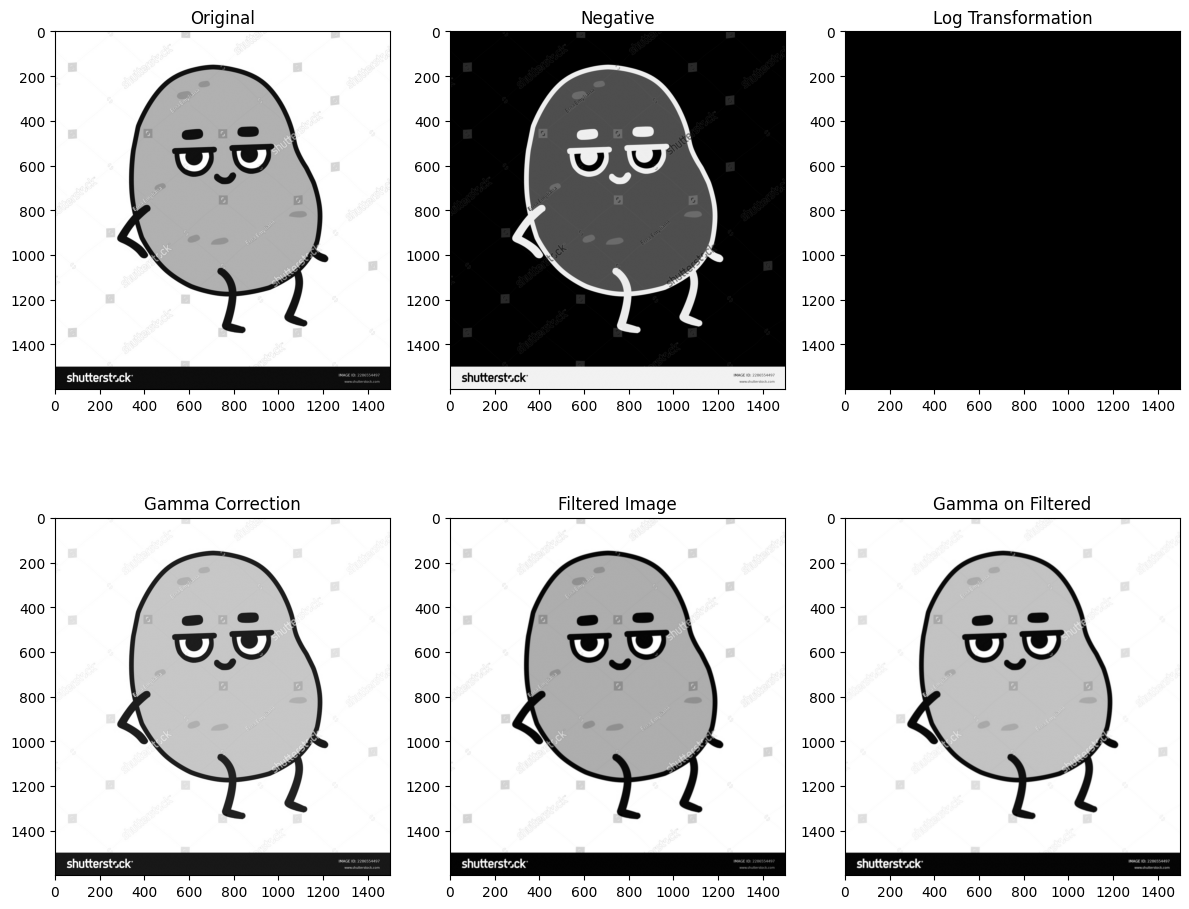

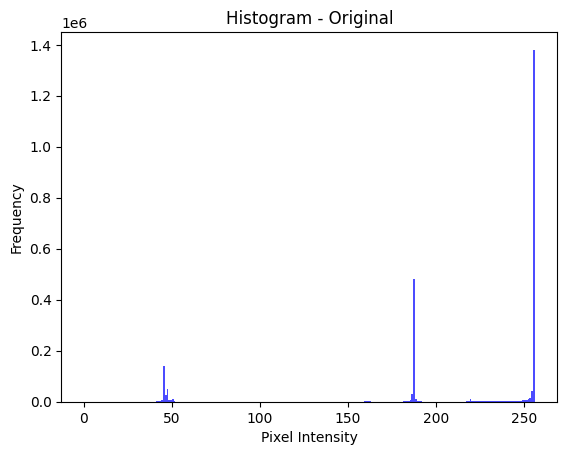

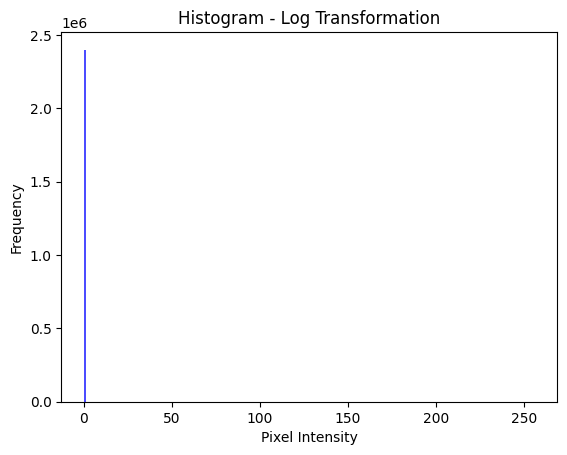

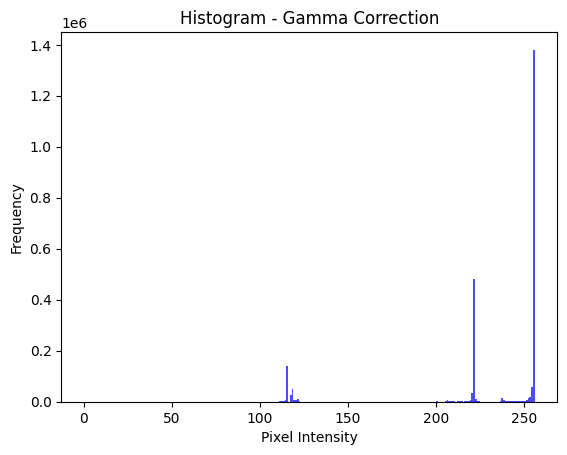

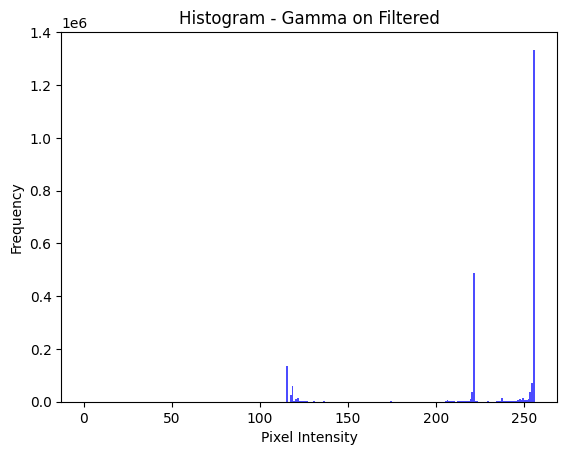

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# =====================
# Load image from URL
# =====================
# Replace this with your Google Drive or online image link
url = "https://www.shutterstock.com/shutterstock/photos/2286554497/display_1500/stock-photo-random-pictures-cute-and-funny-2286554497.jpg"

resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise Exception("Could not load image. Please check the URL!")

# 1. Image Negative
negative_img = 255 - image

# 2. Log Transformation
c = 255 / np.log(1 + np.max(image))
log_img = c * np.log(1 + image.astype(np.float32))
log_img = np.array(log_img, dtype=np.uint8)

# 3. Gamma Correction
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

gamma_img = gamma_correction(image, gamma=2.2)

# 4. Gamma Correction on Filtered Image (Gaussian Filter)
filtered_img = cv2.GaussianBlur(image, (5, 5), 0)
gamma_filtered_img = gamma_correction(filtered_img, gamma=2.2)

# 5. Draw Histograms
def plot_histogram(img, title):
    plt.figure()
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

# Display results
plt.figure(figsize=(12, 10))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(232), plt.imshow(negative_img, cmap='gray'), plt.title("Negative")
plt.subplot(233), plt.imshow(log_img, cmap='gray'), plt.title("Log Transformation")
plt.subplot(234), plt.imshow(gamma_img, cmap='gray'), plt.title("Gamma Correction")
plt.subplot(235), plt.imshow(filtered_img, cmap='gray'), plt.title("Filtered Image")
plt.subplot(236), plt.imshow(gamma_filtered_img, cmap='gray'), plt.title("Gamma on Filtered")

plt.tight_layout()
plt.show()

# Histograms
plot_histogram(image, "Histogram - Original")
plot_histogram(log_img, "Histogram - Log Transformation")
plot_histogram(gamma_img, "Histogram - Gamma Correction")
plot_histogram(gamma_filtered_img, "Histogram - Gamma on Filtered")

plt.show()